<a href="https://colab.research.google.com/github/mtsilimos/Codesnippets_Sentence-Embeddings-for-the-Classification-of-Explicit-Fine-grained-Discourse-Relations/blob/main/useverygood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:



from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


<ipython-input-2-236c02f1b80a>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


In [3]:

X = df['text']
y = df['label']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:

pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 51.9 MB/s eta 0:00:00


In [6]:
pip install scikeras

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout

In [8]:
embedding = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=0,
    min_delta=0.001,
    mode='max'
)


model = tf.keras.Sequential()
model.add(hub_layer)
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='relu'))

model.add(Dense(1,activation='sigmoid'))









In [33]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_16 (Dense)            (None, 20)                10260     
                                                                 
 dense_17 (Dense)            (None, 2)                 42        
                                                                 
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 256808129 (979.65 MB)
Trainable params: 256808129 (979.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), shuffle =  True, epochs=10, batch_size=64, callbacks = [early_stopping])

Epoch 1/10
25/25 [==============================] - 166s 6s/step - loss: 0.4638 - accuracy: 0.9775 - val_loss: 0.4749 - val_accuracy: 0.8500
Epoch 2/10
25/25 [==============================] - 144s 6s/step - loss: 0.2624 - accuracy: 0.9975 - val_loss: 0.3844 - val_accuracy: 0.8850
Epoch 3/10
25/25 [==============================] - 145s 6s/step - loss: 0.1587 - accuracy: 0.9975 - val_loss: 0.3291 - val_accuracy: 0.8900
Epoch 4/10
25/25 [==============================] - 145s 6s/step - loss: 0.0921 - accuracy: 0.9975 - val_loss: 0.3007 - val_accuracy: 0.8950
Epoch 5/10
25/25 [==============================] - 153s 6s/step - loss: 0.0553 - accuracy: 0.9975 - val_loss: 0.2918 - val_accuracy: 0.9000
Epoch 6/10
25/25 [==============================] - 144s 6s/step - loss: 0.0363 - accuracy: 0.9975 - val_loss: 0.2928 - val_accuracy: 0.8975


In [35]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 19ms/step - loss: 0.2928 - accuracy: 0.8975


[0.292810320854187, 0.8974999785423279]

In [36]:

model.evaluate(x_train, y_train)

50/50 [==============================] - 1s 13ms/step - loss: 0.0300 - accuracy: 0.9975


[0.030033113434910774, 0.9975000023841858]

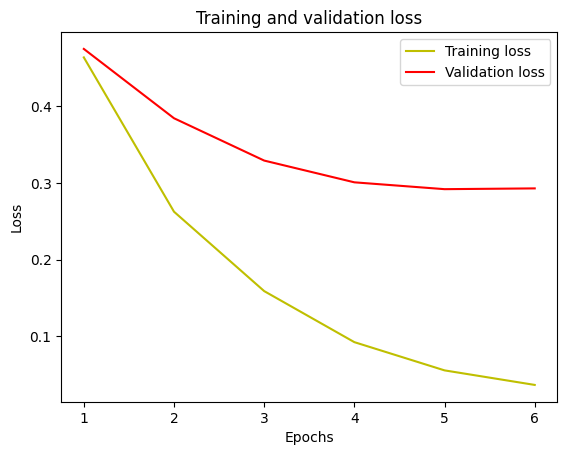

In [37]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

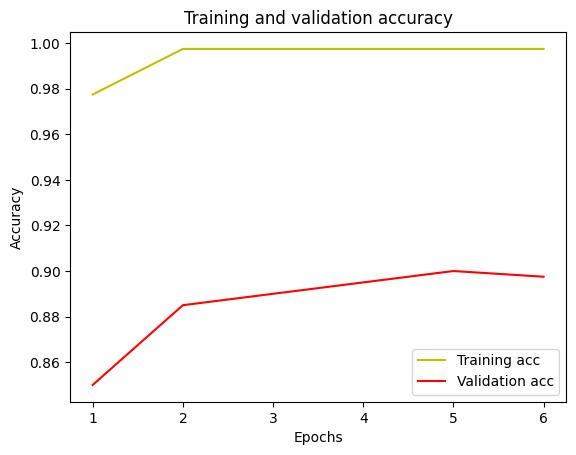

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()